In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline

In [2]:
sample = {
        'pcf_1' : {
            'LayerA' : {'n_components' : 3, 'n_cooling_layers' : 3, 'n_holes' : 3, 'n_holes_prop' : 1,  'total_component_area' : 223, 'total_cooling_area' : 123},
            'LayerB' : {'n_components' : 4, 'n_cooling_layers' : 3, 'n_holes' : 2, 'n_holes_prop' : 0.7, 'total_component_area' : 123, 'total_cooling_area' : 23},
            'PowerComponents' : [('A', 0.12), ('B', 0), ('C', 0.7)], 'PurePowerComponents' : [('B', 0)], 'cooling_area_occupied' : [0.7, 0.3],
            'layout_area' : 333
            },
        'pcf_2' : {
            'LayerA' : {'n_components' : 4, 'n_cooling_layers' : 3, 'n_holes' : 2, 'n_holes_prop' : 0.7, 'total_component_area' : 123, 'total_cooling_area' : 23},
            'LayerB' : {'n_components' : 3, 'n_cooling_layers' : 3, 'n_holes' : 3, 'n_holes_prop' : 1,  'total_component_area' : 223, 'total_cooling_area' : 123},
            'PowerComponents' : [('A', 0.12), ('B', 0), ('C', 0.7)], 'PurePowerComponents' : [('B', 0)], 'cooling_area_occupied' : [0.7, 0.3],
            'layout_area' : 353
            }
        }

In [20]:
def parse_output(data):
    pcf_files = np.array(list(data.keys()))
    print(pcf_files)
    output_file = []
    for file in pcf_files:
        n_components_a = data[file]['LayerA']['n_components']
        n_cooling_layers_a = data[file]['LayerA']['n_cooling_layers']
        n_holes_prop_a = data[file]['LayerA']['n_holes_prop']
        total_cooling_area_a = data[file]['LayerA']['total_component_area']
        total_component_area_a = data[file]['LayerA']['total_cooling_area']

        n_components_b = data[file]['LayerB']['n_components']
        n_cooling_layers_b = data[file]['LayerB']['n_cooling_layers']
        n_holes_prop_b = data[file]['LayerB']['n_holes_prop']
        total_cooling_area_b = data[file]['LayerB']['total_component_area']
        total_component_area_b = data[file]['LayerB']['total_cooling_area']

        layout_area = data[file]['layout_area']
        n_power_components = len(data[file]['PowerComponents'])
        n_pure_power_components = len(data[file]['PurePowerComponents'])
        area_occupied_by_components_a = total_component_area_a/layout_area
        area_occupied_by_cooling_area_a = total_cooling_area_a/layout_area
        area_occupied_by_components_b = total_component_area_b/layout_area
        area_occupied_by_cooling_area_b = total_cooling_area_b/layout_area
        output_file.append([file, n_components_a, n_cooling_layers_a, n_holes_prop_a, total_component_area_a, 
            total_cooling_area_a, area_occupied_by_components_a, area_occupied_by_cooling_area_a,
            n_components_b, n_cooling_layers_b, n_holes_prop_b, total_component_area_b, total_cooling_area_b,
            area_occupied_by_components_b, area_occupied_by_cooling_area_b, layout_area, n_power_components, n_pure_power_components])
    columns = ['file', 'n_components_a', 'n_cooling_layers_a', 'n_holes_prop_a', 'total_component_area_a', 'total_cooling_area_a', 'area_occupied_by_components_a', 'area_occupied_by_cooling_area_a', 'n_components_b', 'n_cooling_layers_b', 'n_holes_prop_b', 'total_component_area_b', 'total_cooling_area_b', 'area_occupied_by_components_b', 'area_occupied_by_cooling_area_b', 'layout_area', 'n_power_components', 'n_pure_power_components']
    output_file = np.array(output_file)
    output_file = pd.DataFrame(output_file, columns = columns)
    output_file[[col for col in columns if col != 'file']] = output_file[[col for col in columns if col != 'file']].apply(pd.to_numeric, errors='coerce')
    return output_file

In [21]:
file = parse_output(sample)

['pcf_1' 'pcf_2']


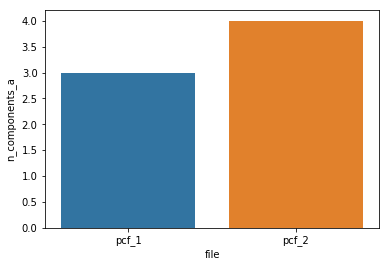

In [22]:
ax = sns.barplot(x="file", y="n_components_a", data=file)

In [23]:
def plot_bar(data):
    for column in data.columns:
        if column != 'file':
            plt.figure(figsize = (20, 20))
            sns.barplot(x = 'file', y = column, data = data)
            plt.savefig(column + "_bargraph.png")
    return None

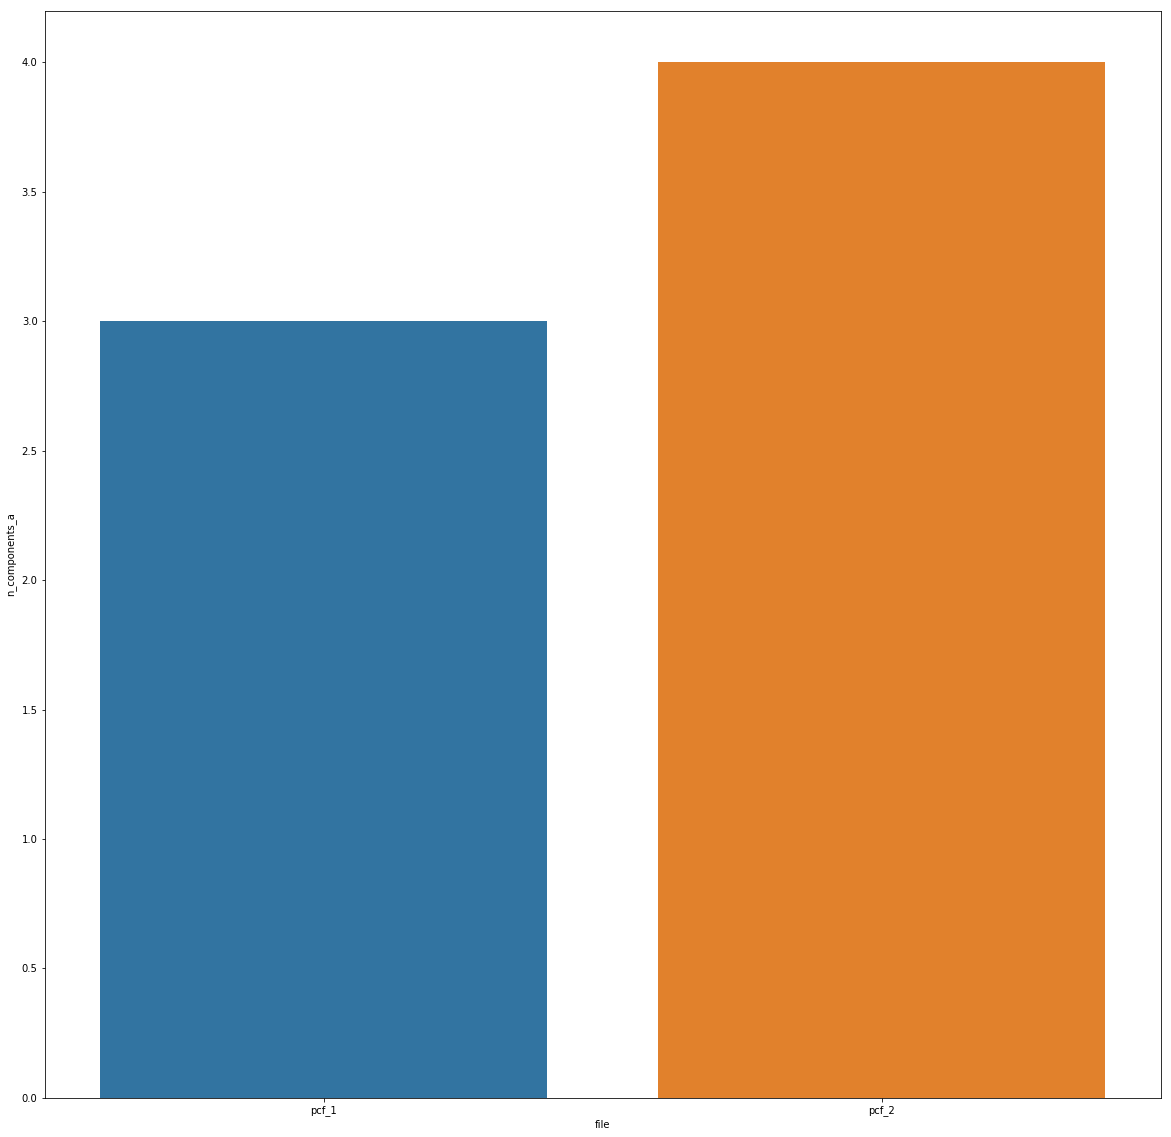

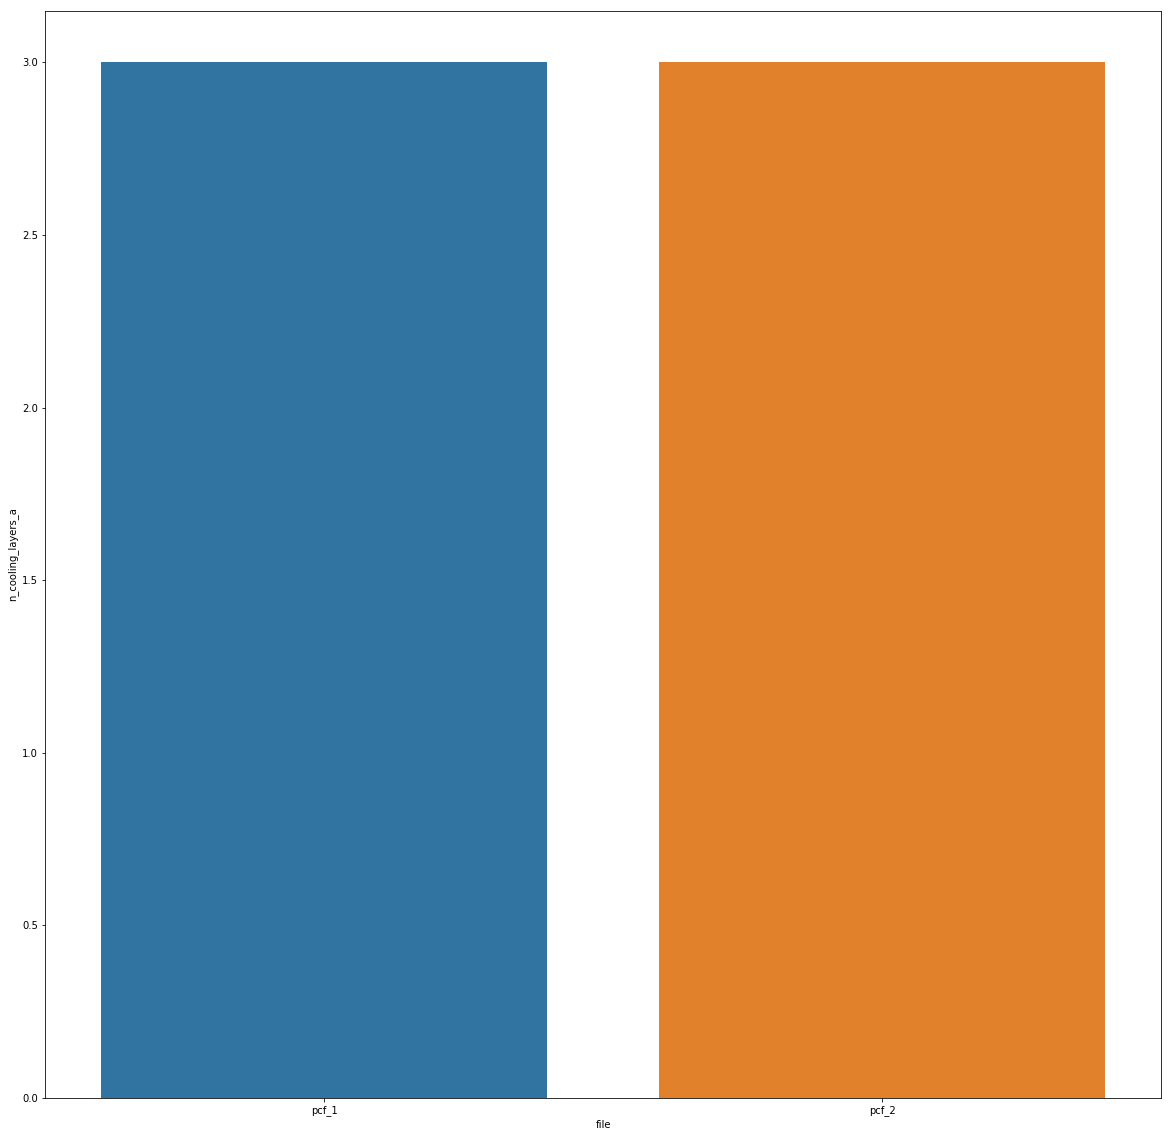

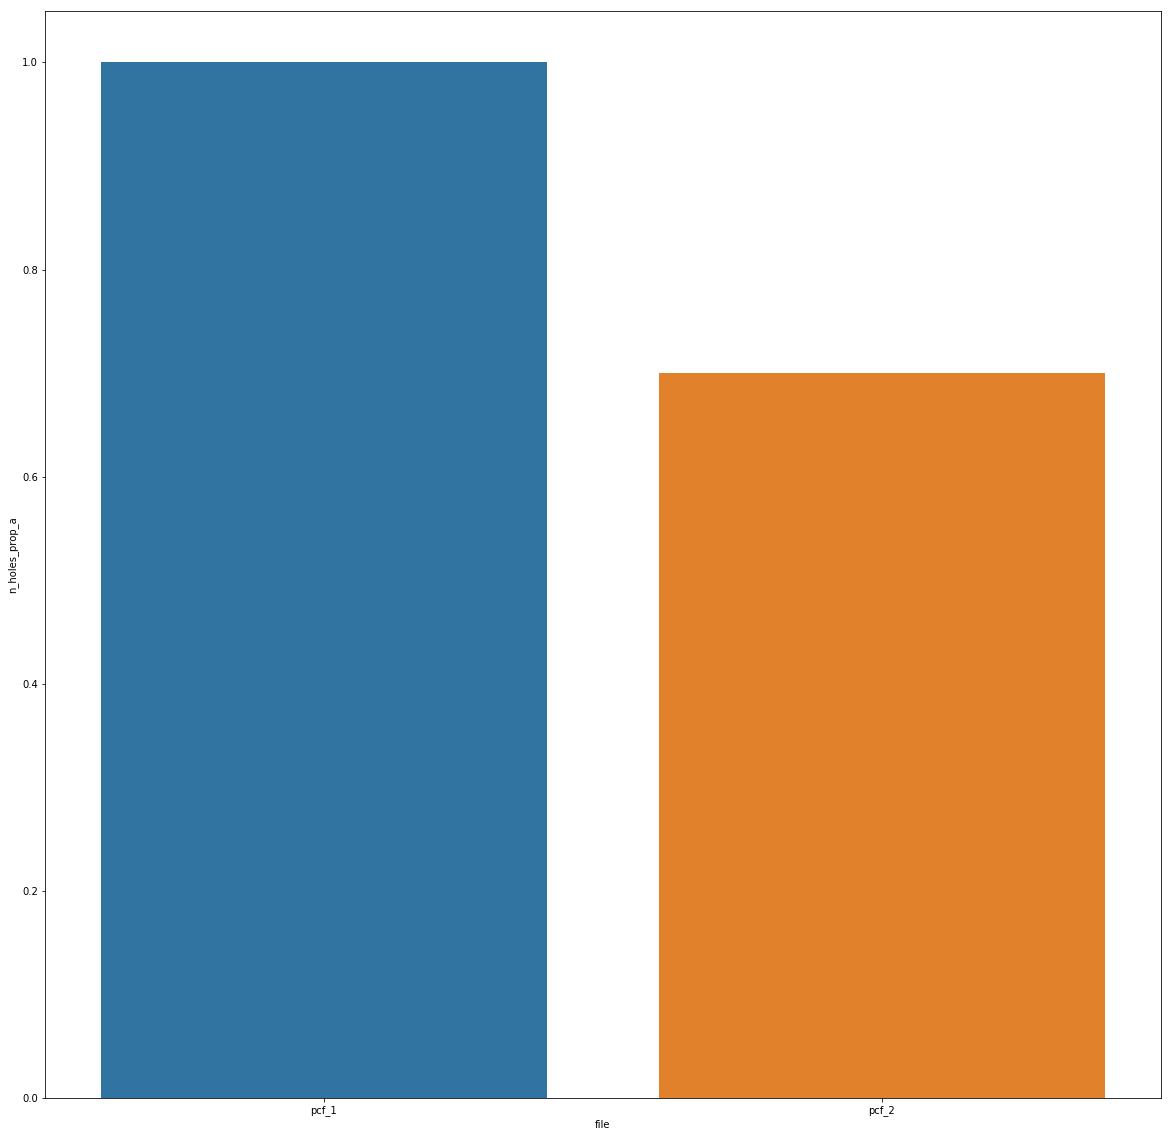

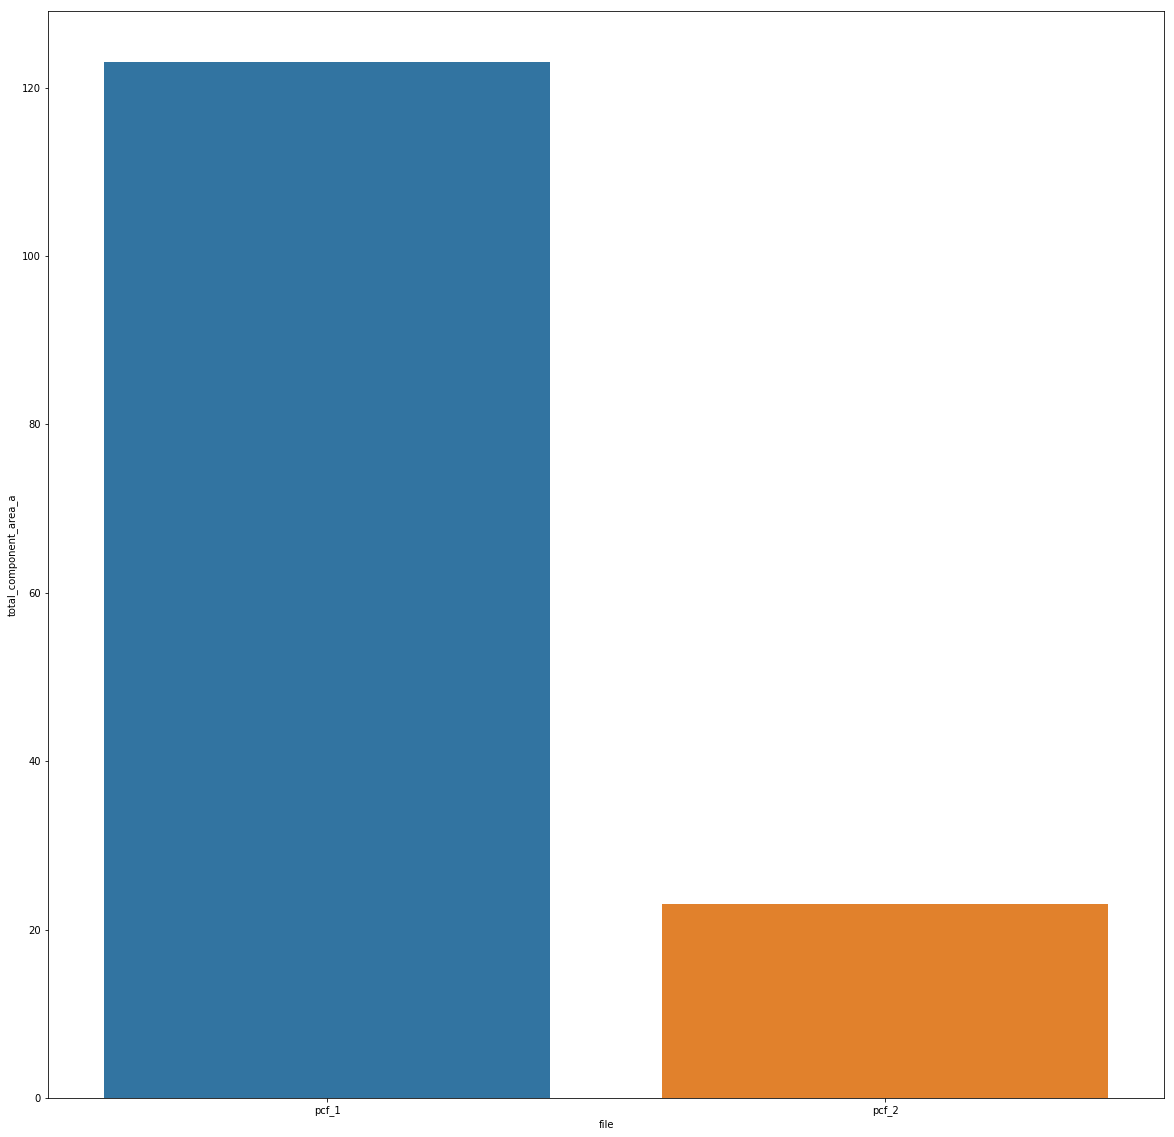

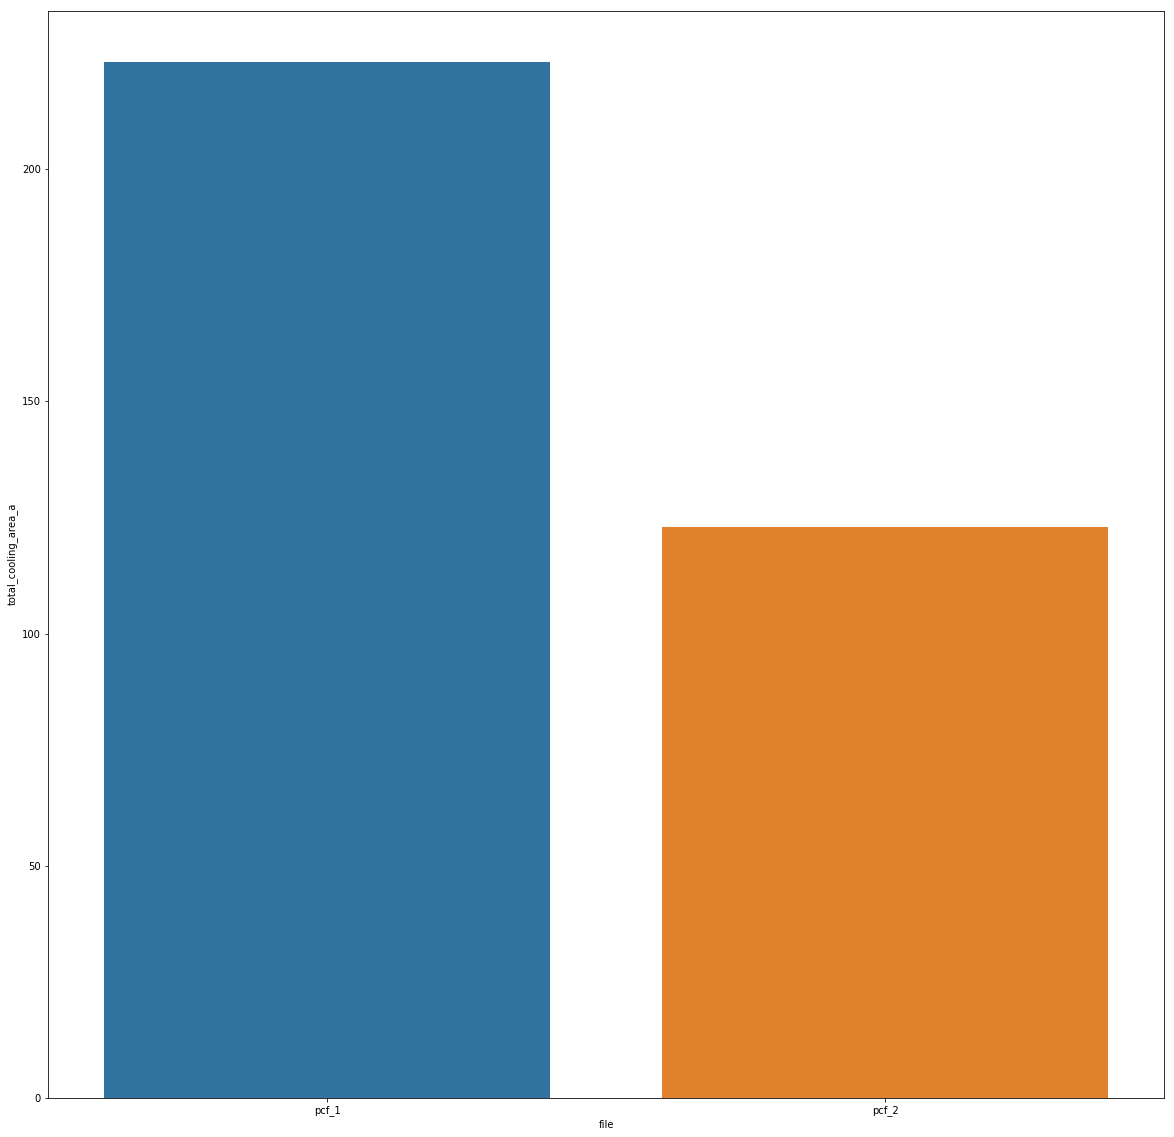

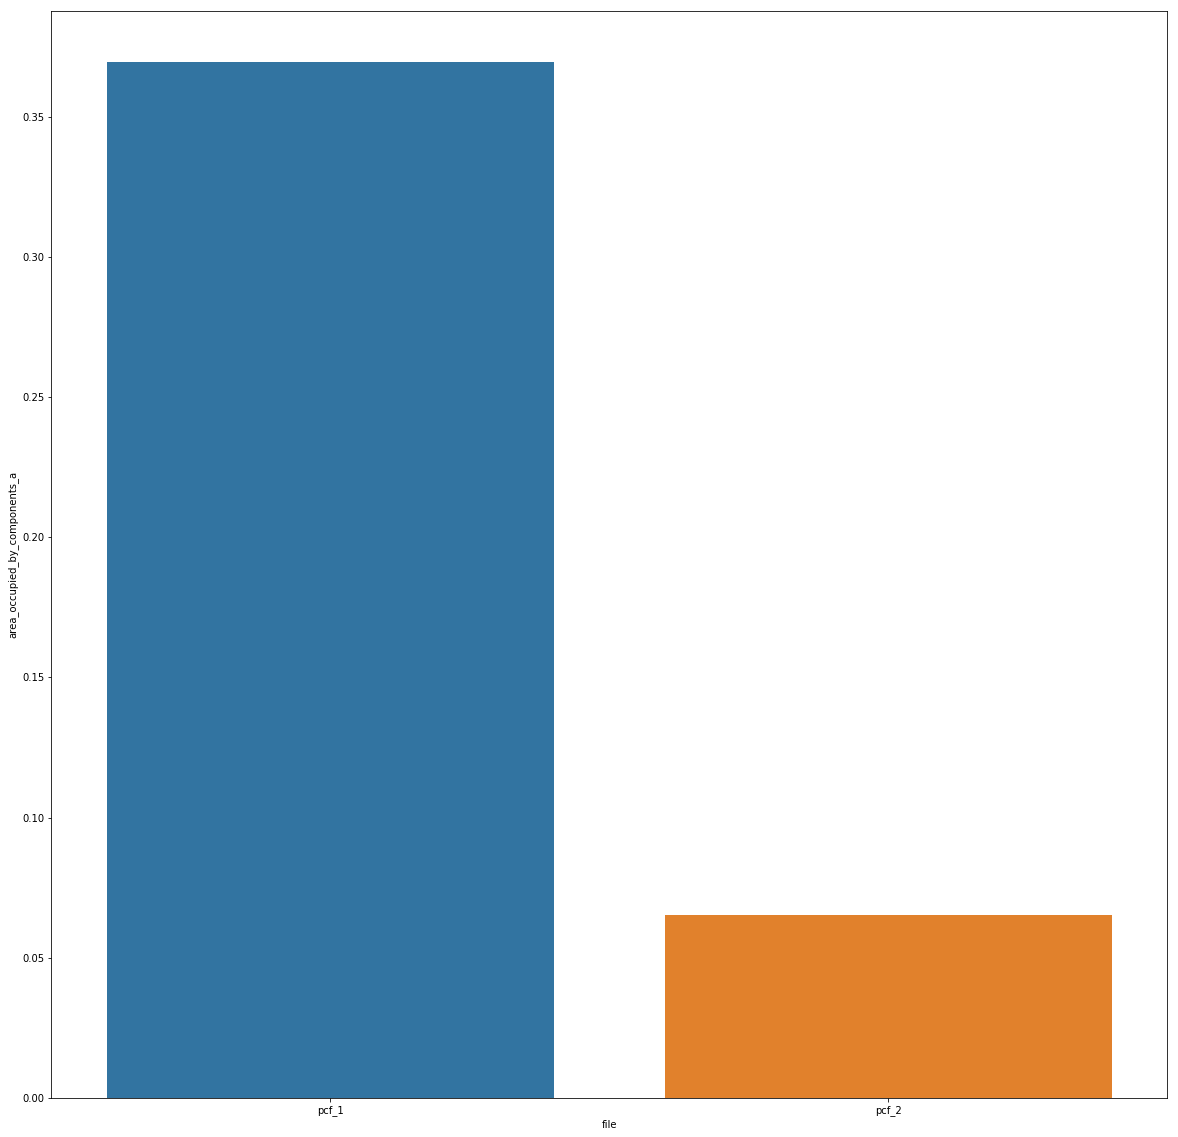

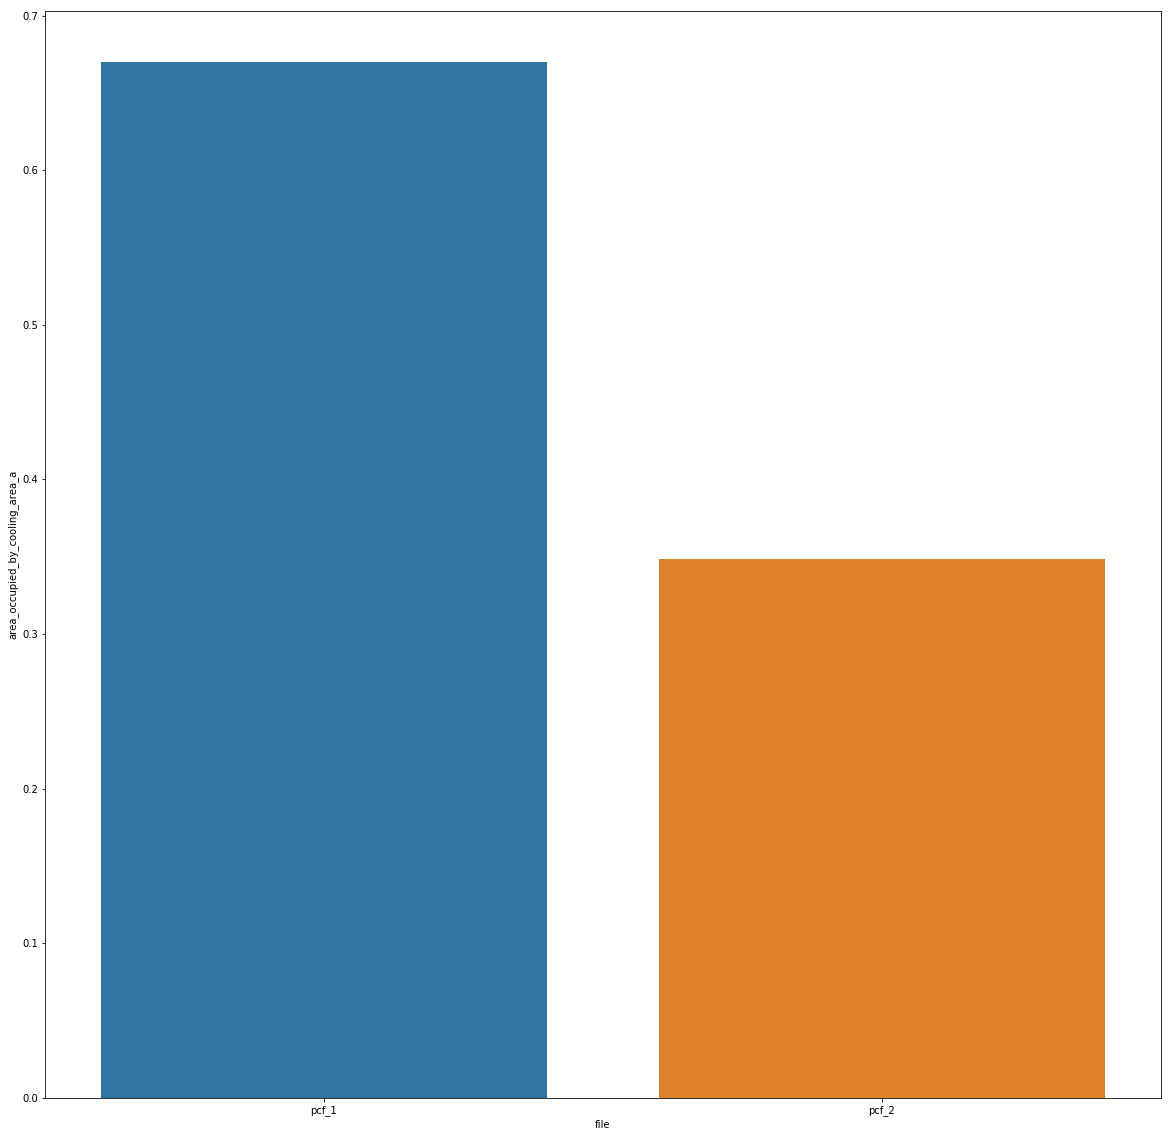

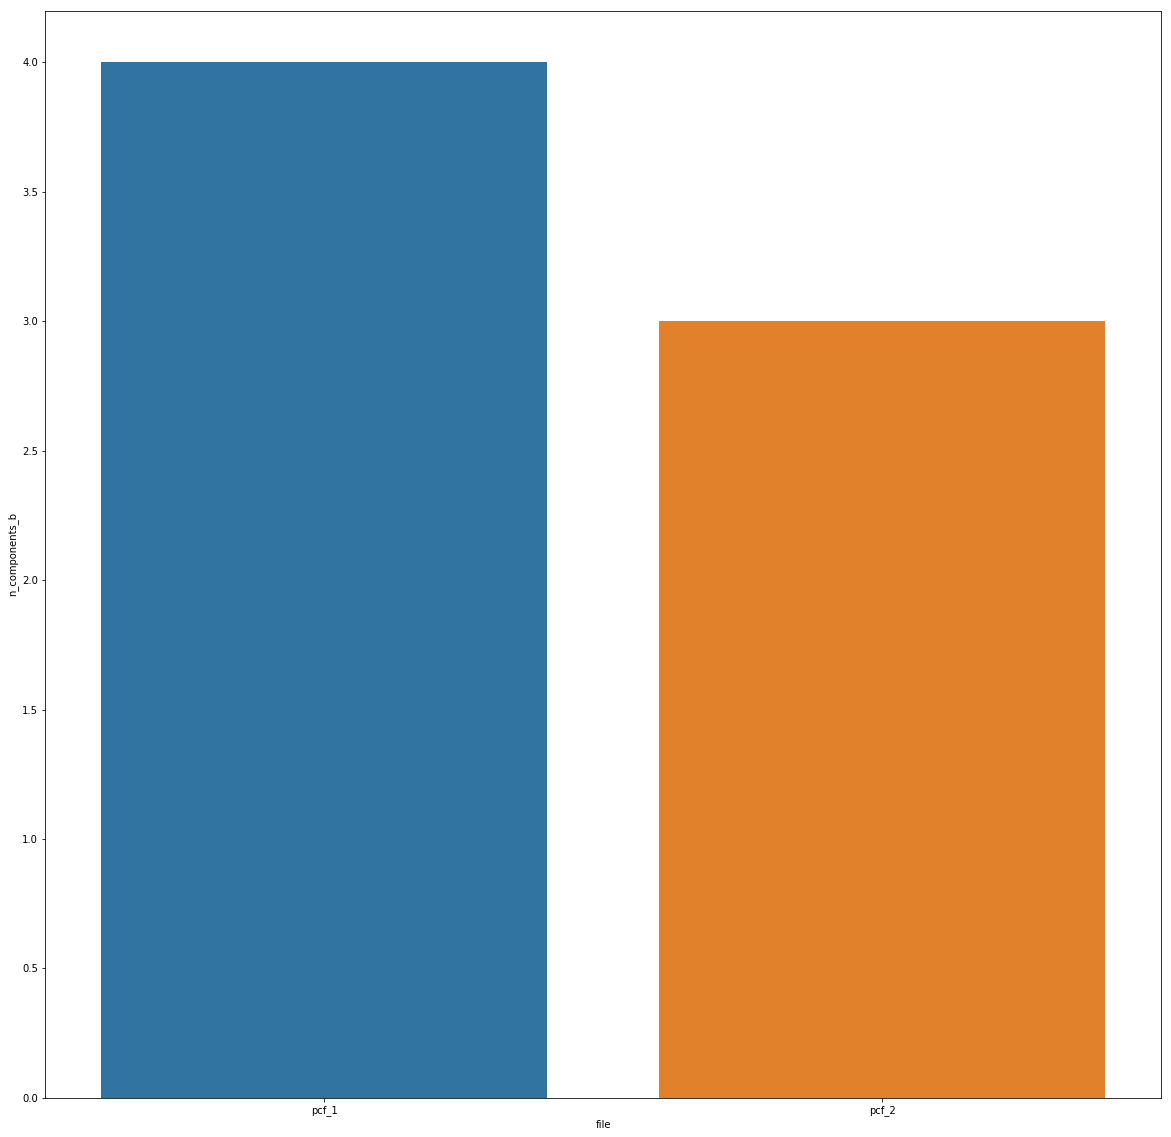

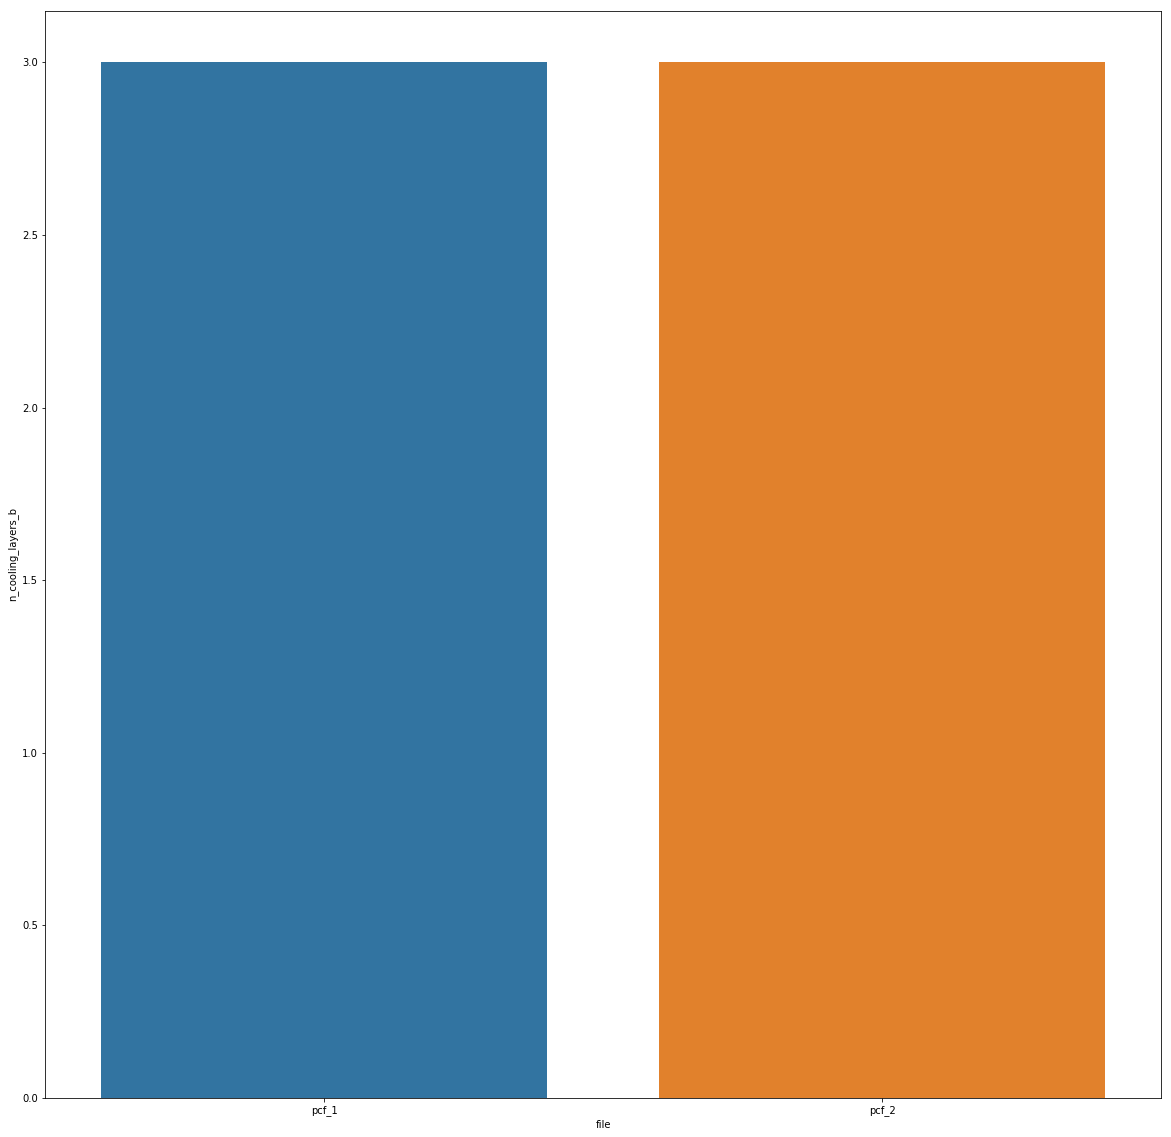

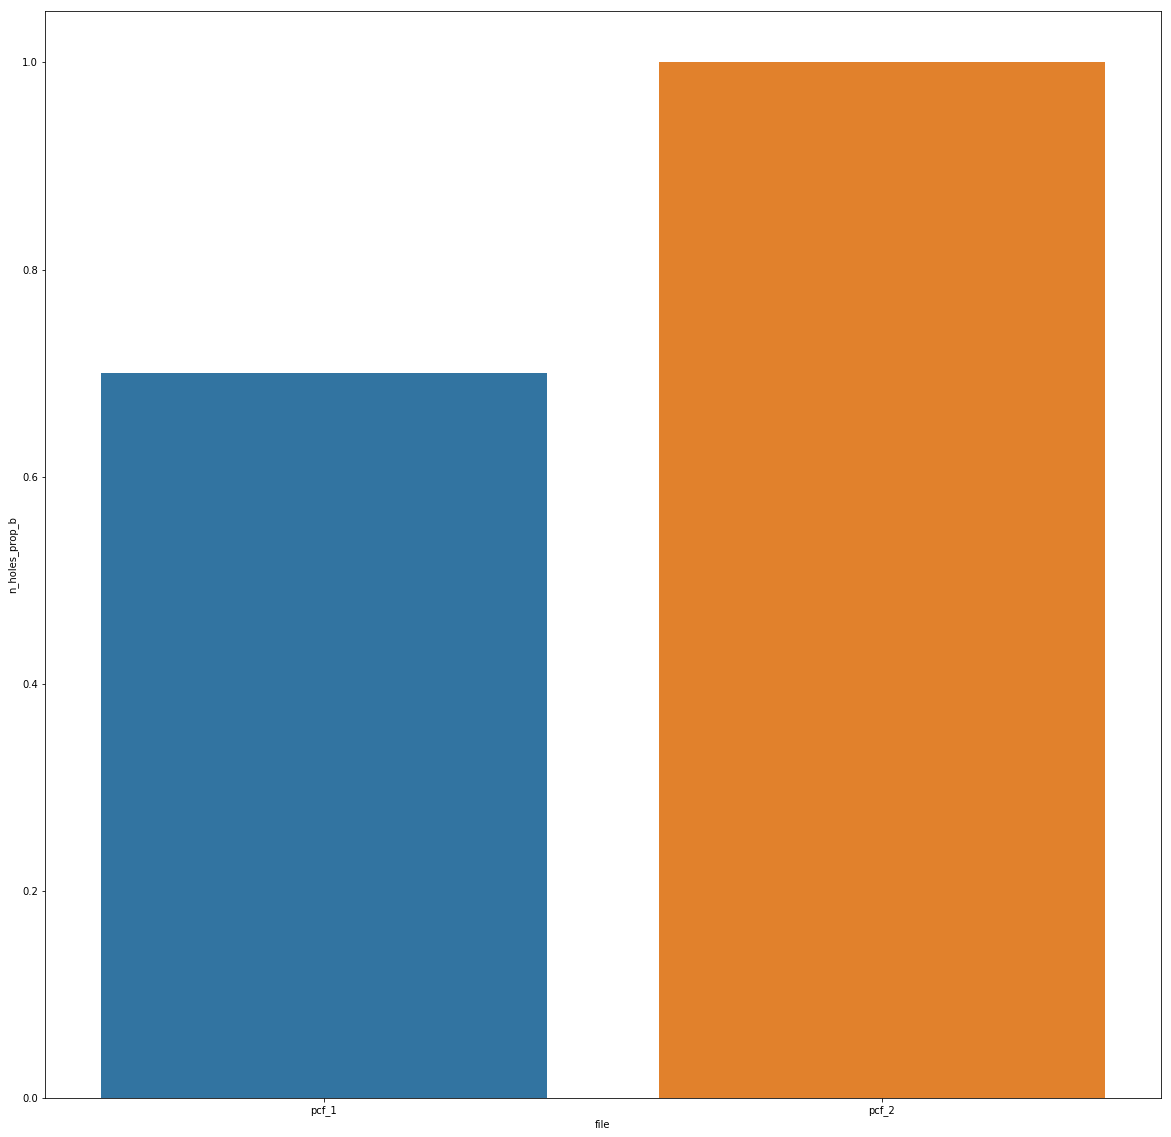

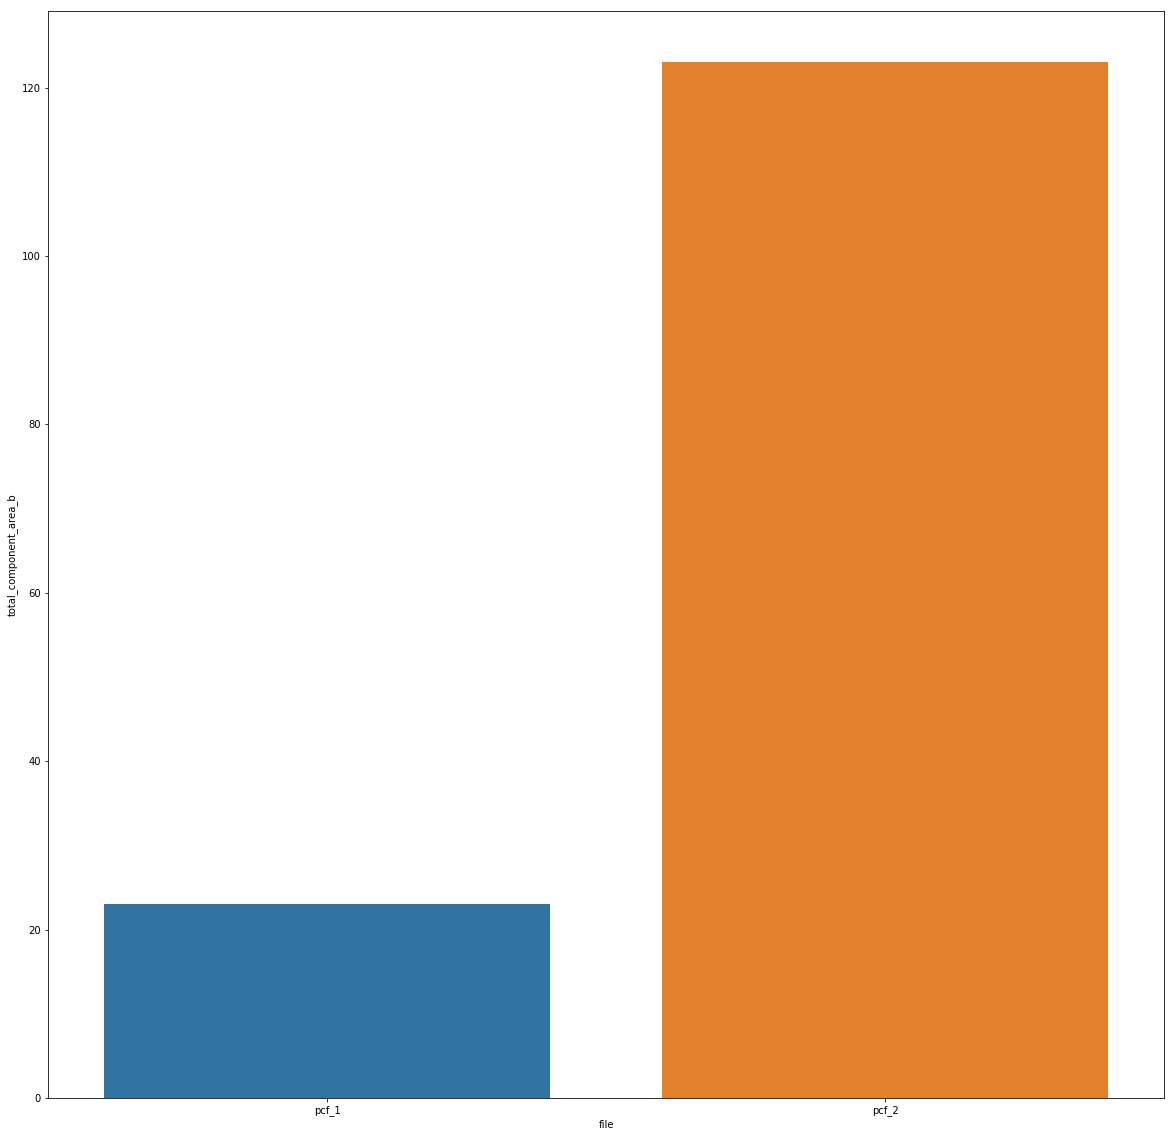

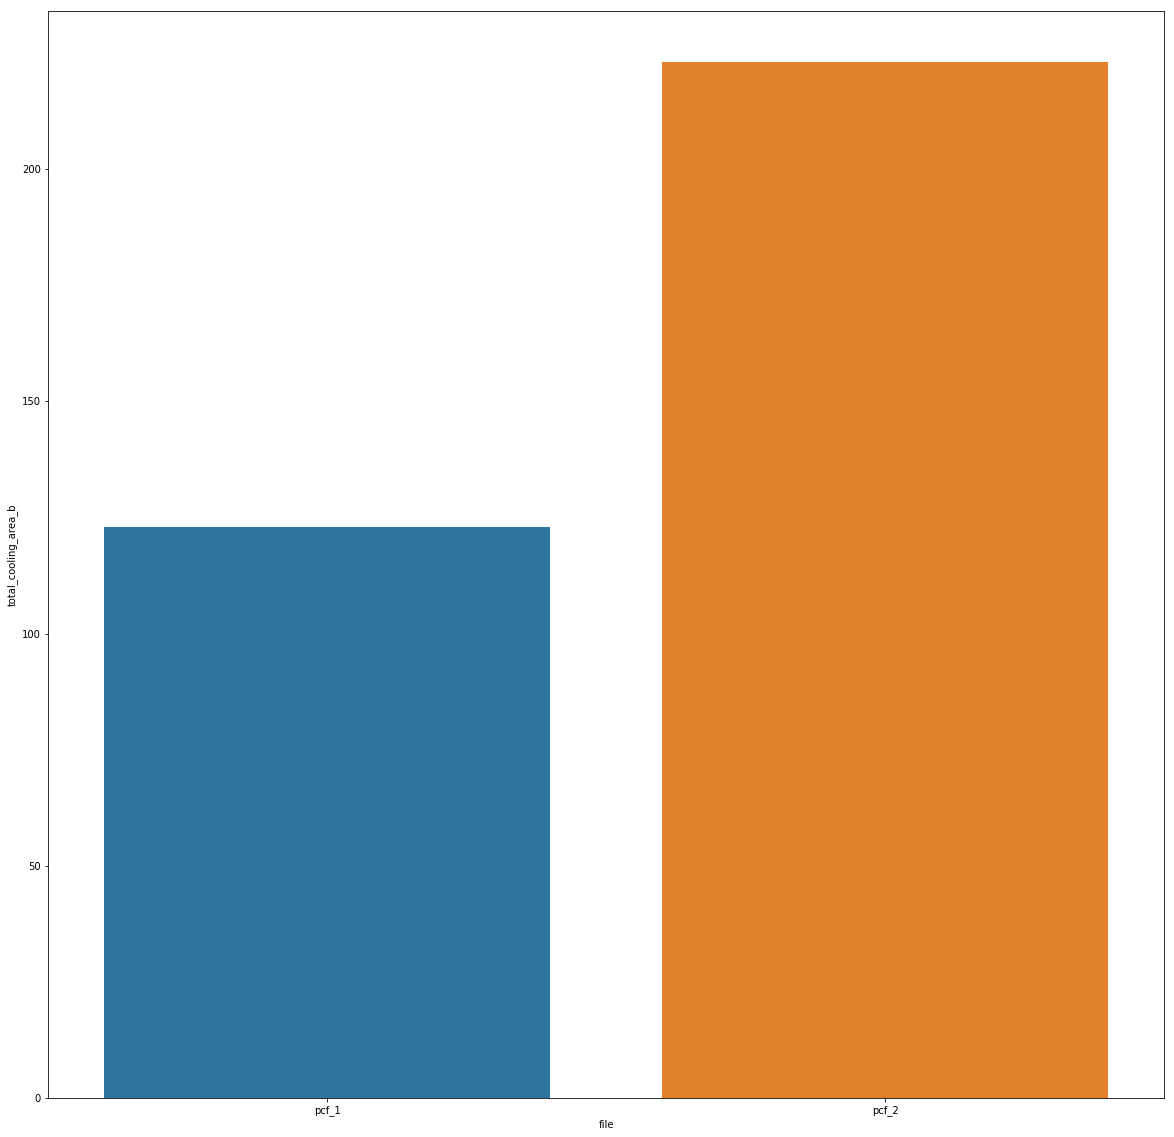

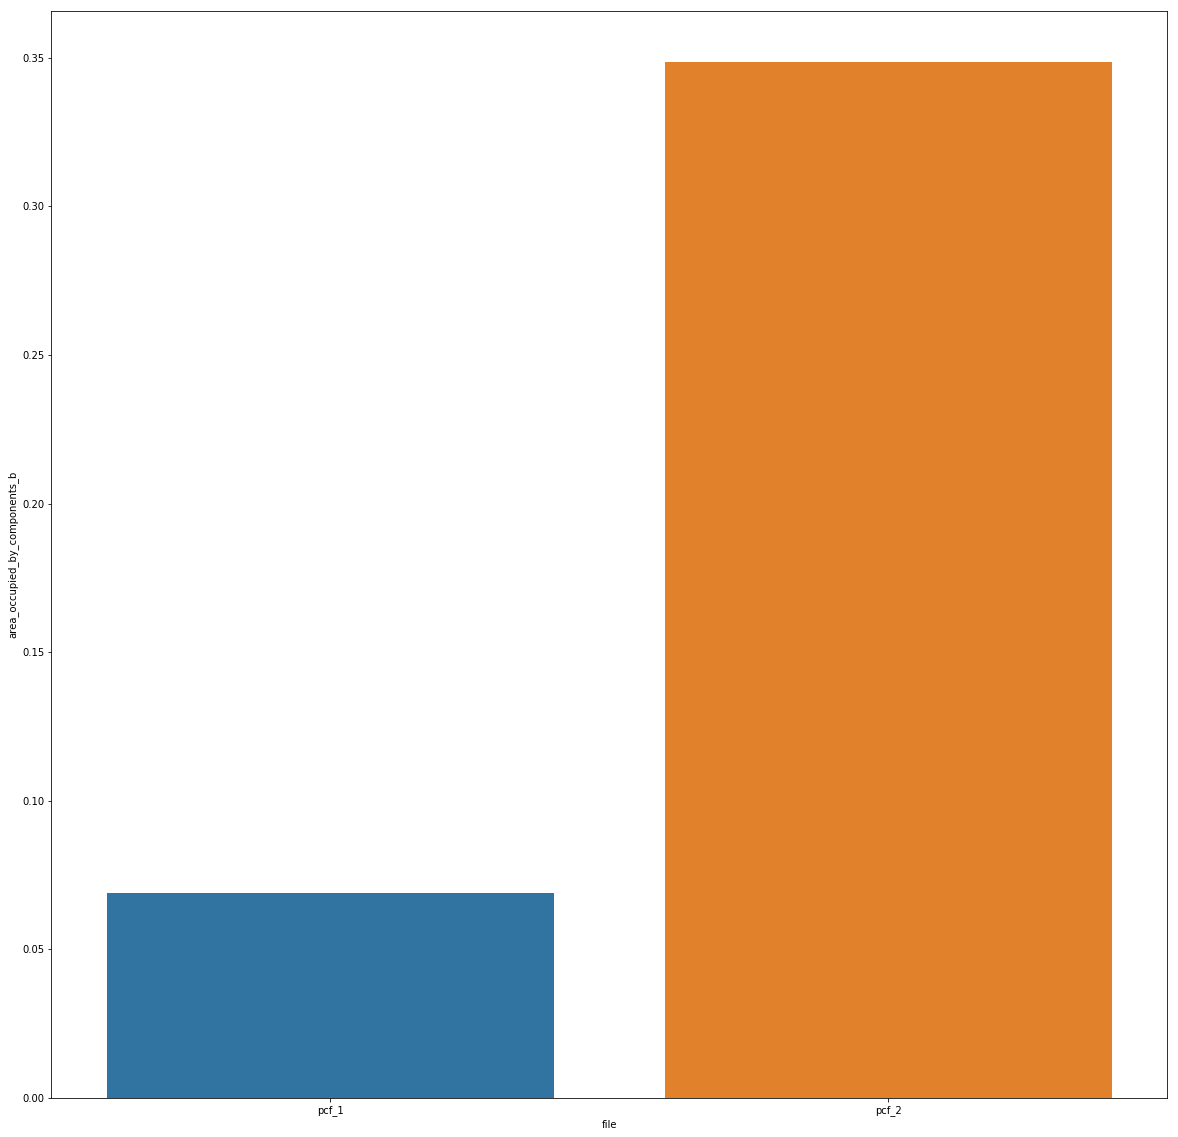

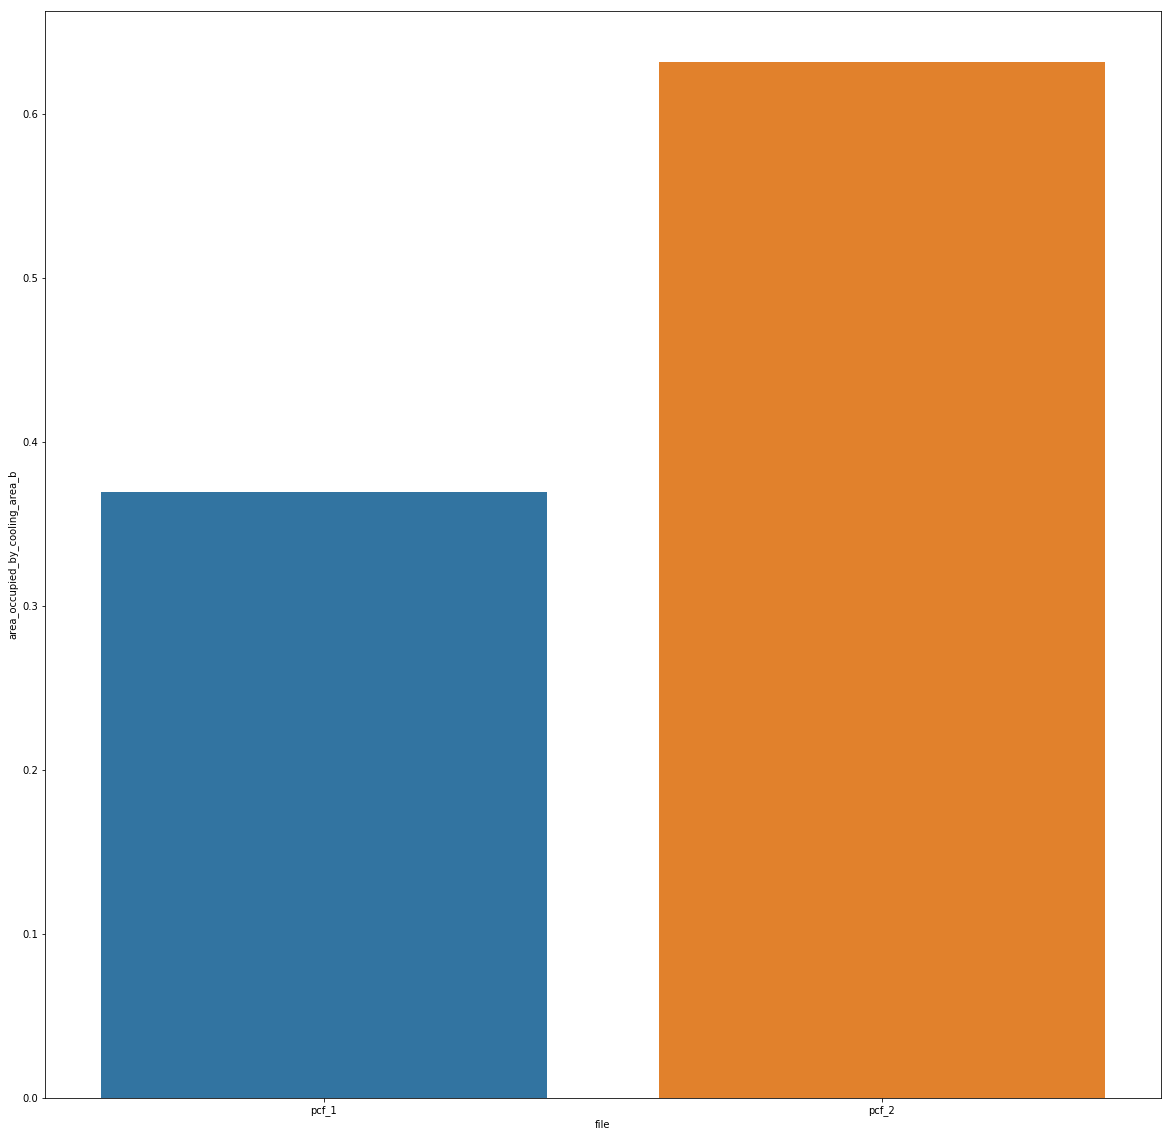

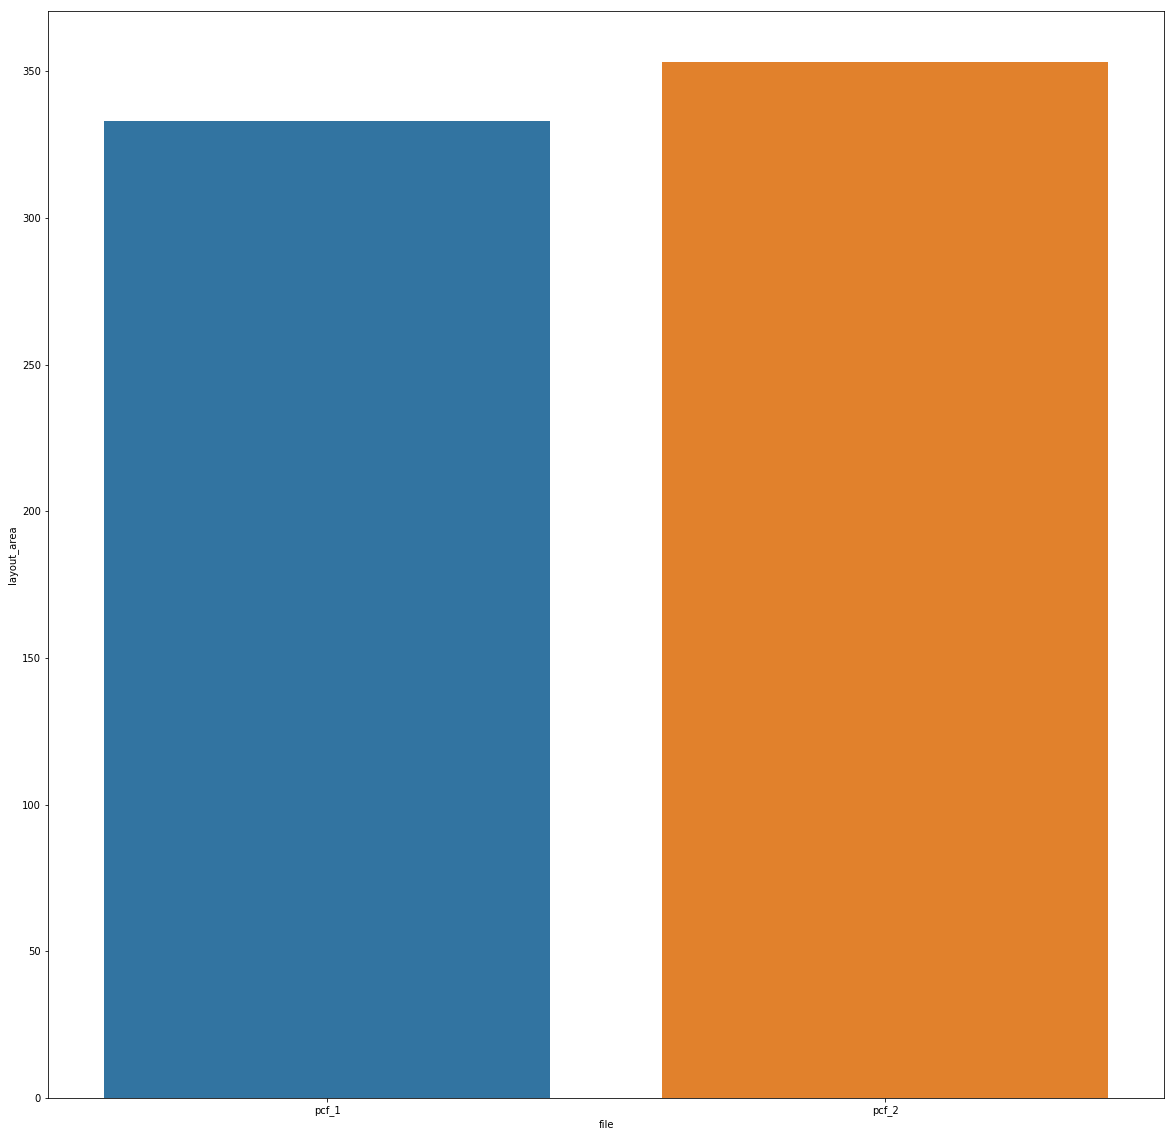

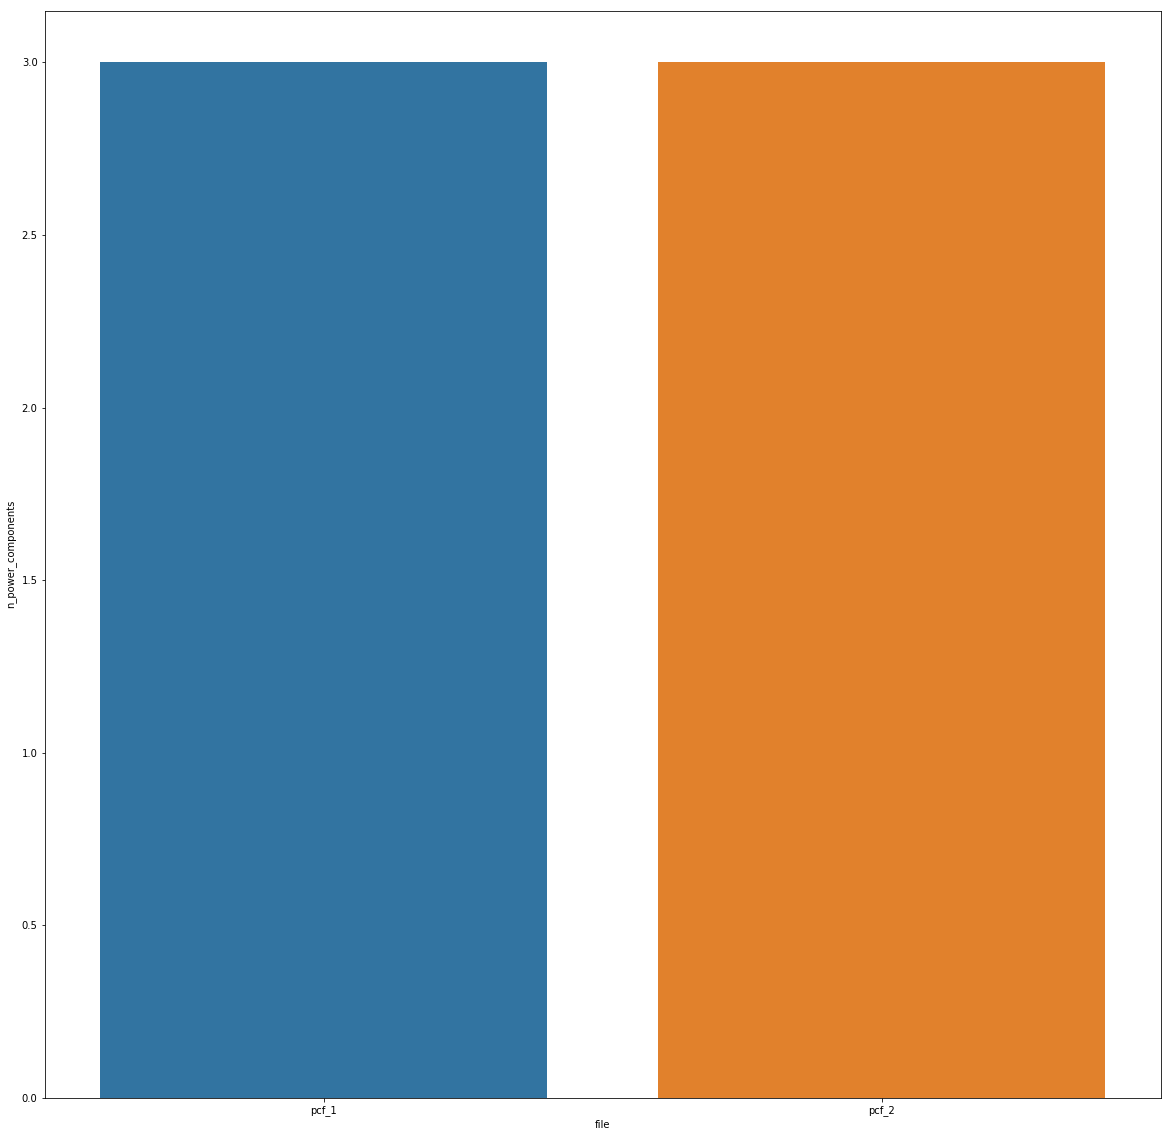

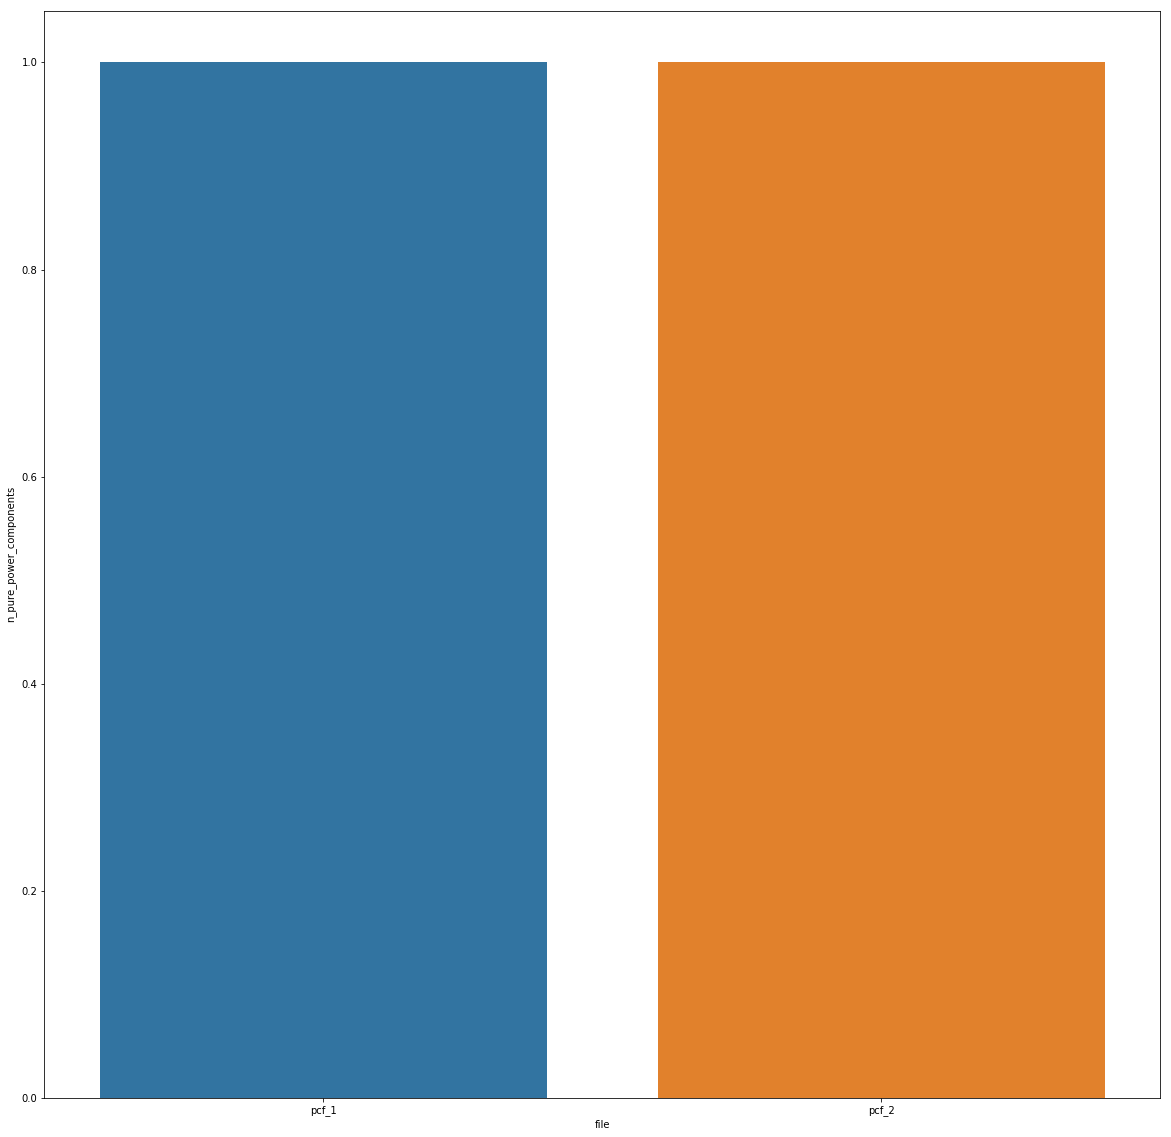

In [24]:
plot_bar(file)